# Home Assignment No. 3: Part 1 

In this part of the homework you are to solve several problems related to machine learning algorithms.
* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem just right after the words **BEGIN SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).
* To do some tasks in this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.
* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.
* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.
* The are problems with \* mark - they are not obligatory. You can get **EXTRA POINTS** for solving them.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


<br>

In [1]:
import numpy as np
import pandas as pd

import torch

%matplotlib inline
import matplotlib.pyplot as plt

<br>

# Bayesian Models. GLM

## Task 1 (1 pt.)

Consider a univariate Gaussian distribution $\mathcal{N}(x; \mu, \tau^{-1})$.
Let's define Gaussian-Gamma prior for parameters $(\mu, \tau)$:

\begin{equation}
    p(\mu, \tau)
        = \mathcal{N}(\mu; \mu_0, (\beta \tau)^{-1})
            \otimes \text{Gamma}(\tau; a, b)
        \,.
\end{equation}

Find the posterior distribution of $(\mu, \tau)$ after observing $X = (x_1, \dots, x_n)$.

**BEGIN Solution**

$$ p(\mu,\tau | X) = \frac{p(X|\mu, \tau) p(\mu, \tau)}{p(X)} = \frac{1}{Z} p(X|\mu, \tau) p(\mu, \tau) $$
$Z$ is normalization constant.
$$p(X|\mu, \tau) = \prod_{i=1}^{n}p(x_i| \mu, \tau) = \left(\frac{\tau}{2\pi}\right)^{\frac{n}{2}}\exp\left(-\frac{\tau}{2}\sum_{i=1}^{n}(x_i - \mu)^2\right) = \left(\frac{\tau}{2\pi}\right)^{\frac{n}{2}}\exp\left(-\frac{\tau}{2}\sum_{i=1}^{n}(x_i - \mu+\overline{x} -\overline{x})^2\right) = $$ 
$$ = \left(\frac{\tau}{2\pi}\right)^{\frac{n}{2}}\exp\left(-\frac{\tau}{2}[n(\mu-\overline{x})^2+\sum_{i=1}^{n}(x_i -\overline{x})^2]\right) $$
$$
p(X|\mu, \tau) p(\mu, \tau) = \frac{b^a}{A} \left(\frac{\tau}{2\pi}\right)^{\frac{n}{2}}\exp\left(-\frac{\tau}{2}[n(\mu-\overline{x})^2+\sum_{i=1}^{n}(x_i -\overline{x})^2]\right) \sqrt{\frac{\beta\tau}{2\pi}} \exp(-\frac{\beta \tau}{2} (\mu-\mu_0)^2)\tau^{a-1}\exp(-\tau b) =$$ 

Firstly, consider the power of $\tau$: $ \tau^{n/2} \tau^{a-1} = \tau^{a_n-1},\:a_n = a+\frac{n}{2}.$ Now consider the power of exponents:
$$
-\frac{\tau}{2}[n(\mu-\overline{x})^2+\sum_{i=1}^{n}(x_i -\overline{x})^2+\beta(\mu-\mu_0)^2+2b]
$$
$$
n(\mu-\overline{x})^2+\beta(\mu-\mu_0)^2=(n+\beta)(\mu-\mu_n)^2-\frac{(n\overline{x}+\beta\mu_0)^2}{n+\beta}
+n\overline{x}^2+\beta\mu_0^2 = \beta_n(\mu-\mu_n)^2-\frac{(n\overline{x}+\beta\mu_0)^2}{n+\beta}
+n\overline{x}^2+\beta\mu_0^2, \;$$ 
$$\beta_n=\beta+n,\;\mu_n=\frac{n\overline{x}+\beta\mu_0}{n+\beta}
$$
$$
2b+ \sum_{i=1}^{n}(x_i -\overline{x})^2-\frac{(n\overline{x}+\beta\mu_0)^2}{n+\beta}+n\overline{x}^2+\beta\mu_0^2 = 2b+\sum_{i=1}^{n}(x_i -\overline{x})^2+\frac{n\beta(\mu_0-\overline{x})^2}{n+\beta}=2b_n
$$
$$
b_n = b+\frac{1}{2}[\sum_{i=1}^{n}(x_i -\overline{x})^2+\frac{n\beta(\mu_0-\overline{x})^2}{n+\beta}]
$$
Due to these new parameters of distribution, posterior distribution of $(\mu,\tau)$ is Gaussian-Gamma, but with new parameters:
$$
p(\mu,\tau | X) = \frac{1}{B} \mathcal{N}(\mu; \mu_n, (\beta_n \tau)^{-1})\otimes \text{Gamma}(\tau; a_n, b_n)$$

**END Solution**

<br>

## Task 2 (1 + 1 + 1 = 3 pt.)

Evaluate the following integral using the Laplace approximation:
\begin{equation}
    x \mapsto \int \sigma(w^T x) \mathcal{N}(w; 0, \Sigma) dw \,,
\end{equation}
for $x = \bigl(\tfrac23, \tfrac16, \tfrac16\bigr)\in \mathbb{R}^3$ and 
\begin{equation}
    \Sigma
        = \begin{pmatrix}
             1    & -0.25 & 0.75 \\
            -0.25 &  1    & 0.5  \\
             0.75 &  0.5  & 2
           \end{pmatrix}
        \,.
\end{equation}

### Task 2.1 (1 pt.)
Use the Hessian matrix computed numericaly via finite differences. (Check out [Numdifftools](https://pypi.python.org/pypi/Numdifftools))

In [4]:
import numdifftools as nd
from scipy.optimize import minimize
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [43]:
### BEGIN Solution
def func(w):
    x = np.array([2./3, 1./6, 1./6])
    cov_matrix = np.array([[1, -0.25, 0.75], [-0.25, 1, 0.5], [0.75, 0.5, 2]])
    sigma = 1/(1+np.exp(-np.dot(w, x)))
    gaussian = np.exp(-np.dot(w, np.linalg.inv(cov_matrix).dot(w))/2)/((2*np.pi)**(3/2)*np.sqrt(np.linalg.det(cov_matrix)))
    return sigma*gaussian

def minus_log_func(w):
    return -np.log(func(w))

w0 = minimize(minus_log_func, np.array([1, 1, 1]), method = 'Nelder-Mead')
w_opt = w0.x

hessian = nd.core.Hessian(minus_log_func, order=4)(w_opt)
integral_nd = func(w_opt)*(2*np.pi)**(3/2)/np.sqrt(np.linalg.det(hessian))

print('The value of integral is:', intergal_nd)
### END Solution

The value of integral is: 0.4979196248470498


<br>

### Task 2.2 (1 pt.)
Use the diagonal approximation of the Hessian computed by autodifferentiation
in **pytorch**.

In [14]:
import torch
from torch.autograd import Variable, grad

In [45]:
def mlog_func_t(w): 
    x=np.array([2./3,1./6,1./6]) 
    cov_matrix=np.array([[1,-0.25,0.75],[-0.25,1,0.5],[-.75,0.5,2]])
    sigma=torch.sigmoid(torch.matmul(w, torch.from_numpy(x).detach()))
    gaussian=torch.exp(-1/2*torch.matmul(torch.matmul(w, torch.from_numpy(np.linalg.inv(cov_matrix)).detach()), w))/((2*np.pi)**(3/2)*np.sqrt(np.linalg.det(cov_matrix)))  
    return -torch.log(sigma * gaussian) 

w0 = Variable(torch.tensor(w_opt), requires_grad = True) 
grads = grad(mlog_func_t(w0), w0, create_graph = True) 
det_H = 1 

for i in range(3): 
    grads2 = grad(grads[0][i], w0, retain_graph=True) 
    det_H = det_H*grads2[0][i].item() 

integral_torch=func(w_opt)*(2*np.pi)**(3/2)/np.sqrt(det_H)
print('The value of integral is:', integral_torch)

The value of integral is: 0.8408207184293238


<br>

### Task 2.3 (1 pt.)

Compare the results comparing the `absolute errors` of the results (this is possible with Monte-Carlo estimate of the integral). Write 1-2 sentences in the results discussion.

In [47]:
### BEGIN Solution
int_MC = 0
N=100000
for i in range(N):
    w = np.random.uniform(-10, 10, 3)
    int_MC+=func(w)
    
int_MC = int_MC*20**3/N
print('Absolute error for numdifftools: %.3f' % (abs(int_MC-integral_nd)))
print('Absolute error for torch: %.3f' % (abs(int_MC-integral_torch)))
### END Solution

Absolute error for numdifftools: 0.009
Absolute error for torch: 0.351


**BEGIN Solution**

The big error in estimation with torch is caused by diagonal appoximation of hessian. Difference between Monte-Carlo method and Laplace estimation using numdifftools can be caused by precision of Laplace approximation and stohastic nature of Monte-Carlo 

**END Solution**

<br>

# Gaussian Processes

## Task 3 (1 + 2 = 3 pt.)

### Task 3.1 (1 pt.)

Assuimng the matrices $A \in \mathbb{R}^{n \times n}$ and $D \in \mathbb{R}^{d \times d}$
are invertible, using **gaussian elimination** find the inverse matrix for the following
block matrix:
\begin{equation}
    \begin{pmatrix} A & B \\ C & D \end{pmatrix} \,,
\end{equation}
where $C \in \mathbb{R}^{d \times n}$ and $B \in \mathbb{R}^{n \times d}$.

**BEGIN Solution**

$$  \left(\begin{array}{c c|c c} A & B & I_n & 0\\ C & D & 0 & I_d \end{array}\right) \rightarrow \left(\begin{array}{c c|c c} CA^{-1}A & CA^{-1}B & CA^{-1} & 0\\ C & D & 0 & I_d \end{array}\right) \rightarrow \left(\begin{array}{c c|c c} I_n & A^{-1}B & A^{-1} & 0\\ 0 & D-CA^{-1}B & -CA^{-1} & I_d \end{array}\right) \rightarrow \left(\begin{array}{c c|c c} I_n & A^{-1}B & A^{-1} & 0\\ 0 & A^{-1}B(D-CA^{-1}B)^{-1}(D-CA^{-1}B) & -A^{-1}B(D-CA^{-1}B)^{-1}CA^{-1} & A^{-1}B(D-CA^{-1}B)^{-1} \end{array}\right) \rightarrow \left(\begin{array}{c c|c c} I_n & 0 & A^{-1}+A^{-1}B(D-CA^{-1}B)^{-1}CA^{-1} & -A^{-1}B(D-CA^{-1}B)^{-1}\\ 0 & I_d & -(D-CA^{-1}B)^{-1}CA^{-1} & (D-CA^{-1}B)^{-1} \end{array}\right)$$
$$
$$
$$
\begin{pmatrix} A & B \\ C & D \end{pmatrix}^{-1} = \begin{pmatrix} A^{-1}+A^{-1}B(D-CA^{-1}B)^{-1}CA^{-1} & -A^{-1}B(D-CA^{-1}B)^{-1}\\ -(D-CA^{-1}B)^{-1}CA^{-1} & (D-CA^{-1}B)^{-1} \end{pmatrix}
$$

**END Solution**

<br>

### Task 3.2 (2 pt.)

Assume that the function $y(x)$, $x \in \mathbb{R}^d$, is a realization of the Gaussian
Process $GP\bigl(0; K(\cdot, \cdot)\bigr)$ with $K(a, b) = \exp({- \gamma \|a - b\|_2^2}))$.

Suppose two datasets were observed: **noiseless** ${D_0}$ and **noisy** ${D_1}$
\begin{aligned}
    & D_0 = \bigl(x_i, y(x_i) \bigr)_{i=1}^{n} \,, \\
    & D_1 = \bigl(x^\prime_i, y(x^\prime_i) + \varepsilon_i \bigr)_{i=1}^{m} \,,
\end{aligned}
where $\varepsilon_i \sim \text{ iid } \mathcal{N}(0, \sigma^2)$, independent of process $y$.

Derive the conditional distribution of $y(x) \big\vert_{D_0, D_1}$ at a new $x$.

**BEGIN Solution**

Let's consider the joint datasets with $n+m$ number of samples, where last $m$ samples have noise $\varepsilon_i \sim \text{ iid } \mathcal{N}(0, \sigma^2)$.

The covariation function matrix is:
$$
K = \begin{pmatrix} K_{nn} & K_{mn}^{\top} \\ K_{mn} & K_{mm} \end{pmatrix}, K_{nn}(x_i, x_j) = \bigl[\exp({- \gamma \|x_i - x_j\|_2^2}) \bigr]_{i, j=1}^{n}, K_{mn}(x_i, x_j) = \bigl[\exp({- \gamma \|x_i - x_j\|_2^2}) \bigr]_{i=1, j=1}^{m,n},\\ K_{mm}(x_i, x_j) = \bigl[\exp({- \gamma \|x_i - x_j\|_2^2}) \bigr]_{i, j=1}^{m}
$$
The "noise" matrix is:
$$\begin{pmatrix} 0 & 0 \\ 0 & \sigma^2 I_{m} \end{pmatrix}$$
How it was in lecture, let's denote $x_*$ - test sample, $y_*=y(x_*)$. $\hat{y}$ is the vector of all $y$ from $D_0, D_1$.
Let's denote $K_{**}= \exp(- \gamma \|x_* - x_*\|_2^2)=1$. $k_* = \bigl[\exp(- \gamma \|x_* - x_j\|_2^2) \bigr]_{j=1}^{n+m}$.

Due to posterior distribution of $y_*$ from lecture we have the following distribution:

$$p(y_*|D_0, D_1) = \mathcal{N}(y_*|\mu_*, \sigma_*^2)$$

$$\mu_* = k_*^{\top} \begin{pmatrix} K_{nn} & K_{mn}^{\top} \\ K_{mn} & K_{mm} +\sigma^2 I_{m} \end{pmatrix}^{-1}\hat{y}$$
$$\sigma_*^2=K_{**}- k_*^{\top} \begin{pmatrix} K_{nn} & K_{mn}^{\top} \\ K_{mn} & K_{mm} +\sigma^2 I_{m} \end{pmatrix}^{-1}k_*$$

**END Solution**

<br>

## Task 4 (1 + 2 = 3 pt.)

### Task 4.1 (1 pt.)

> In the late 1950’s Charles Keeling invented an accurate way to measure atmospheric $CO_2$ concentration and began taking regular measurements at the Mauna Loa observatory.


Take `monthly_co2_mlo.csv` file, load it and prepare the data.

0. Load the `CO2 [ppm]` time series
1. Replace $-99.99$ with **NaN** and drop the missing observations
2. Split the time series into train and test
3. Normalize the target value by fitting a transformation on the train
4. Plot the resulting target against the time index

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### BEGIN Solution
X = pd.read_csv(r'data/monthly_co2_mlo.csv')

for column in X.columns:
    for i in X.index:
        if X[column][i] == -99.99:
            X[column][i] = 'NaN'

X = X.dropna(axis=0)

y = X['CO2 [ppm]']
X = pd.DataFrame(X['year'])
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2, random_state=42)

scaler = StandardScaler()
y_test = np.array(y_test).reshape([-1, 1])
y_train = np.array(y_train).reshape([-1, 1])

scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

begin = float(np.min(X)) 
X_test = np.array(X_test)
X_test = X_test-begin
X_train = np.array(X_train)
X_train = X_train-begin
### END Solution

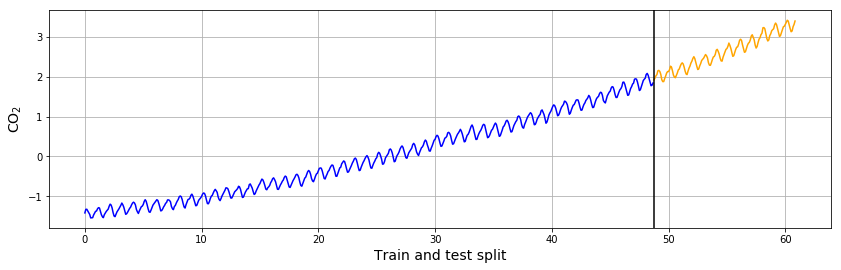

In [5]:
# >>> your code here <<<
plt.figure(figsize=(14, 4))
plt.plot(X_train, y_train, color='blue')
plt.plot(X_test, y_test, color='orange')
plt.grid(True)
plt.axvline(x=float(np.min(X_test)), color='black')
plt.xlabel('Train and test split', fontsize=14)
plt.ylabel(r'CO$_2$', fontsize=14);

<br>

### Task 4.2 (2 pt.)

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

1. Plot mean and confidence interval of the prediction. 
2. Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
3. Estimate the prediction error with `r2_score`. R2-score accepted > 0.83 on test sample.

In [0]:
from GPy.models import GPRegression
from GPy.kern import RBF, Poly, StdPeriodic, White, Linear
from sklearn.metrics import r2_score

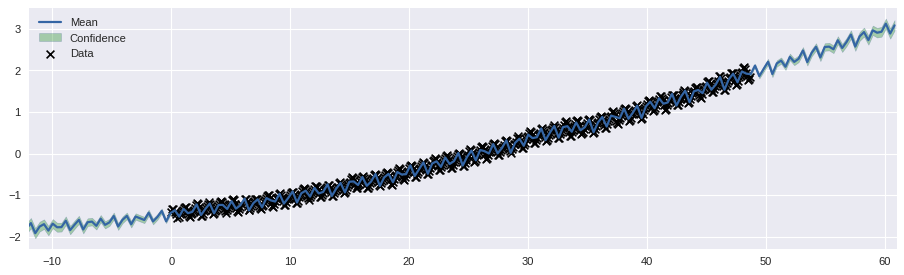

In [24]:
### BEGIN Solution
kern = RBF(1)*StdPeriodic(1)+RBF(1)
regr = GPRegression(X_train, y_train, kern)
regr.optimize()
y_pred_test = regr.predict(X_test)

fig, ax = plt.subplots(figsize=(14, 4), dpi=80, frameon=False)
regr.plot_confidence(label='Confidence', ax=ax, alpha=0.3, color='green', lower=2.5, upper=97.5)
regr.plot_mean(label='Mean', ax=ax)
regr.plot_data(label='Data', ax=ax)
ax.set_xbound([-12, 61])
ax.legend();
### END Solution

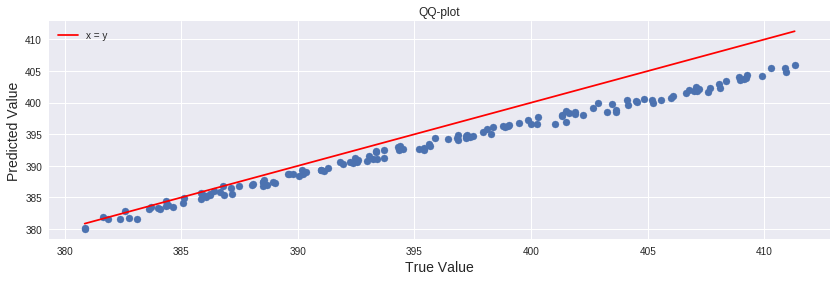

In [21]:
# >>> your code here <<<
y_pred_test_new = scaler.inverse_transform(y_pred_test[0])
y_test_new = scaler.inverse_transform(y_test)
fig = plt.figure(figsize=(14, 4), facecolor='white')
fig.patch.set_facecolor('white')
plt.scatter(y_test_new, y_pred_test_new)
plt.plot(np.linspace(np.min(y_test_new), np.max(y_test_new), 100), np.linspace(np.min(y_test_new), np.max(y_test_new), 100), color = 'red', label='x = y')
plt.legend()
plt.grid(True)
plt.title('QQ-plot')
plt.xlabel('True Value', fontsize=14);
plt.ylabel('Predicted Value', fontsize=14);

In [25]:
r2_score(y_test_new, y_pred_test_new)

0.8681805937630482